In [1]:
from google.colab import drive
drive.mount('/gdrive')
# drive.mount('gdrive/') # for Ronaldlee 

Mounted at /gdrive


In [2]:
%cd /gdrive/MyDrive/datasets

/gdrive/.shortcut-targets-by-id/1JOljQjRM1_Z8M4AxVUF-amm8pC8GSc8J/datasets


In [3]:
# load all the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings

pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

In [4]:
# focused countries

COUNTRIES = """Argentina
Bolivia
Brazil
Chile
Colombia
Costa Rica
Cuba
Dominican Republic
Ecuador
El Salvador
French Guiana
Guadeloupe
Guatemala
Haiti
Honduras
Martinique
Mexico
Nicaragua
Panama
Paraguay
Peru
Puerto Rico
Saint Barthélemy
Saint Martin
Uruguay
Venezuela
Brunei
Cambodia
Timor-Leste
Indonesia
Laos
Malaysia
Burma (Myanmar)
Philippines
Singapore
Thailand
Vietnam""".split("\n")

In [5]:
def readCsvFile(filepath, encoding = "utf-8"):
    """
        Function to read csv file
        args:
            filepath : path to csv file
        return:
            df : dataframe
    """
    
    df = pd.read_csv(filepath, encoding = encoding)
    df.columns = df.columns.str.lower().str.replace(" ", "_")
    
    df.drop(df.columns[-1], inplace=True, axis = 1)
    
    return df

In [6]:
# read world record indicators
raw_indicators = readCsvFile("WorldDevelopmentIndicators.csv", encoding = 'utf8') 

In [7]:
# read data file
raw_us_aid = readCsvFile('us_foreign_aid_complete.csv')

In [8]:
# fix year column
raw_us_aid['fiscal_year'] = np.where(raw_us_aid.fiscal_year=="1976tq", "1976", raw_us_aid.fiscal_year)

In [9]:
# list of indicators
raw_indicators.series_name.unique()

array(['Access to clean fuels and technologies for cooking (% of population)',
       'Access to clean fuels and technologies for cooking, rural (% of rural population)',
       'Access to clean fuels and technologies for cooking, urban (% of urban population)',
       ...,
       'Women who were first married by age 18 (% of women ages 20-24)',
       "Women's share of population ages 15+ living with HIV (%)",
       'Young people (ages 15-24) newly infected with HIV'], dtype=object)

In [10]:
print("Total indicators: \n")
raw_indicators.series_name.nunique()

Total indicators: 



1478

In [11]:
# filter for focused countries

indicators_df = raw_indicators.query("country_name == @COUNTRIES")
foreign_aid_df = raw_us_aid.query("country_name == @COUNTRIES")

In [12]:
indicators_df.series_name.nunique()

1478

In [13]:
# transform dataframe into proper format

transformd_df = indicators_df.melt(id_vars = ['country_name', 'country_code', 'series_name', 'series_code'], var_name = "year", value_name = "metric_value")

In [14]:
# consider only recent data

transformd_df

,country_name,country_code,series_name,series_code,year,metric_value
0,Thailand,THA,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,1960_[yr1960],..
1,Thailand,THA,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,1960_[yr1960],..
2,Thailand,THA,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,1960_[yr1960],..
3,Thailand,THA,Access to electricity (% of population),EG.ELC.ACCS.ZS,1960_[yr1960],..
4,Thailand,THA,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,1960_[yr1960],..
...,...,...,...,...,...,...
1466171,Vietnam,VNM,Women who believe a husband is justified in be...,SG.VAW.REFU.ZS,2021_[yr2021],..
1466172,Vietnam,VNM,Women who were first married by age 15 (% of w...,SP.M15.2024.FE.ZS,2021_[yr2021],..
1466173,Vietnam,VNM,Women who were first married by age 18 (% of w...,SP.M18.2024.FE.ZS,2021_[yr2021],..
1466174,Vietnam,VNM,Women's share of population ages 15+ living wi...,SH.DYN.AIDS.FE.ZS,2021_[yr2021],33.3


In [15]:
# consider only recent data

transformd_df = transformd_df[transformd_df.year == '2021_[yr2021]']
transformd_df.sample(5)

,country_name,country_code,series_name,series_code,year,metric_value
1455987,Haiti,HTI,Children (0-14) living with HIV,SH.HIV.0014,2021_[yr2021],5700
1461582,Cuba,CUB,"Survey mean consumption or income per capita, ...",SI.SPR.PCAP,2021_[yr2021],..
1463453,Colombia,COL,"Contributing family workers, female (% of fema...",SL.FAM.WORK.FE.ZS,2021_[yr2021],5.094321
1443437,Thailand,THA,"Net official flows from UN agencies, UNPBF (cu...",DT.NFL.UNPB.CD,2021_[yr2021],..
1451387,Malaysia,MYS,Women who believe a husband is justified in be...,SG.VAW.ARGU.ZS,2021_[yr2021],..


In [16]:
pd = transformd_df.series_name
print(pd)

1442528    Access to clean fuels and technologies for coo...
1442529    Access to clean fuels and technologies for coo...
1442530    Access to clean fuels and technologies for coo...
1442531              Access to electricity (% of population)
1442532    Access to electricity, rural (% of rural popul...
                                 ...                        
1466171    Women who believe a husband is justified in be...
1466172    Women who were first married by age 15 (% of w...
1466173    Women who were first married by age 18 (% of w...
1466174    Women's share of population ages 15+ living wi...
1466175    Young people (ages 15-24) newly infected with HIV
Name: series_name, Length: 23648, dtype: object


In [17]:
pd = transformd_df[transformd_df.series_name == 'GDP per capita growth (annual %)']

In [18]:
pd

,country_name,country_code,series_name,series_code,year,metric_value
1443009,Thailand,THA,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,2021_[yr2021],1.35595700059554
1444487,Singapore,SGP,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,2021_[yr2021],12.1967208124475
1445965,Philippines,PHL,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,2021_[yr2021],4.13510874396911
1447443,Nicaragua,NIC,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,2021_[yr2021],8.81985648527825
1448921,Mexico,MEX,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,2021_[yr2021],4.1363722123716
1450399,Malaysia,MYS,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,2021_[yr2021],1.944118177395
1451877,Cambodia,KHM,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,2021_[yr2021],1.83295801608998
1453355,Indonesia,IDN,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,2021_[yr2021],2.97337518015345
1454833,Guatemala,GTM,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,2021_[yr2021],6.39408498115625
1456311,Haiti,HTI,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,2021_[yr2021],-3.00580329140145


In [19]:
countryes = pd.country_name.to_list()
GDP = pd.metric_value.to_list()
print(countryes)
print(GDP)

['Thailand', 'Singapore', 'Philippines', 'Nicaragua', 'Mexico', 'Malaysia', 'Cambodia', 'Indonesia', 'Guatemala', 'Haiti', 'El Salvador', 'Ecuador', 'Cuba', 'Costa Rica', 'Colombia', 'Vietnam']
['1.35595700059554', '12.1967208124475', '4.13510874396911', '8.81985648527825', '4.1363722123716', '1.944118177395', '1.83295801608998', '2.97337518015345', '6.39408498115625', '-3.00580329140145', '9.90409111652892', '3.01037816290692', '1.65281715243313', '6.93558539226061', '9.41827880580655', '1.69938954511899']


In [20]:
for i in range(16):
    GDP[i] = float(GDP[i])

print(GDP)


[1.35595700059554, 12.1967208124475, 4.13510874396911, 8.81985648527825, 4.1363722123716, 1.944118177395, 1.83295801608998, 2.97337518015345, 6.39408498115625, -3.00580329140145, 9.90409111652892, 3.01037816290692, 1.65281715243313, 6.93558539226061, 9.41827880580655, 1.69938954511899]


In [21]:
CPI = [35,85,33,20,31,48,27,38,25,20,34,36,46,58,39,39]
print(len(CPI))

16


In [22]:
X = []
for i in range(16):
    X.append([CPI[i],GDP[i]])
X= np.array(X)
print(X)


[[35.          1.355957  ]
 [85.         12.19672081]
 [33.          4.13510874]
 [20.          8.81985649]
 [31.          4.13637221]
 [48.          1.94411818]
 [27.          1.83295802]
 [38.          2.97337518]
 [25.          6.39408498]
 [20.         -3.00580329]
 [34.          9.90409112]
 [36.          3.01037816]
 [46.          1.65281715]
 [58.          6.93558539]
 [39.          9.41827881]
 [39.          1.69938955]]


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

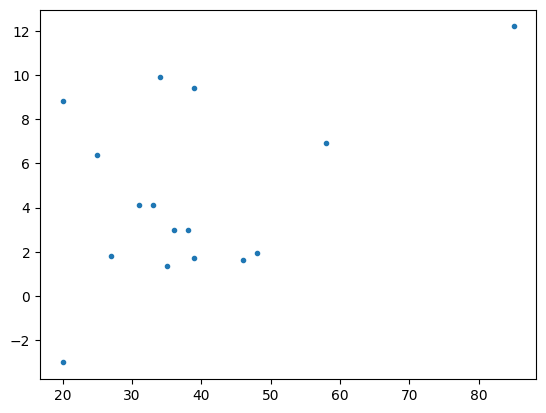

In [24]:
plt.scatter(X[:, 0], X[:, 1], marker='.')

In [25]:
k_means = KMeans(init="k-means++", n_clusters=4, n_init=12)
k_means.fit(X)

KMeans(n_clusters=4, n_init=12)

In [26]:
k_means_labels = k_means.labels_
print('k_means_labels : ', k_means_labels)

k_means_cluster_centers = k_means.cluster_centers_
print('k_means_cluster_centers : ', k_means_cluster_centers)

k_means_labels :  [2 3 2 0 2 1 0 2 0 0 2 2 1 1 2 2]
k_means_cluster_centers :  [[23.          3.51027405]
 [50.66666667  3.51084024]
 [35.625       4.57911885]
 [85.         12.19672081]]


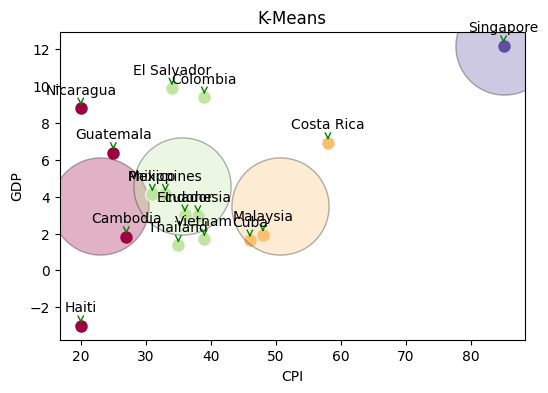

In [27]:
# 지정된 크기로 초기화
fig = plt.figure(figsize=(6, 4))

# 레이블 수에 따라 색상 배열 생성, 고유한 색상을 얻기 위해 set(k_means_labels) 설정
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# plot 생성
ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(4), colors):
    my_members = (k_means_labels == k)

    # 중심 정의
    cluster_center = k_means_cluster_centers[k]

    # 중심 그리기
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.', markersize=20)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=70, alpha= 0.3)

for i in range(16):
    ax.annotate(countryes[i], # this is the value which we want to label (text)
                 X[i], # x and y is the points location where we have to label
                 textcoords="offset points",
                 xytext=(0,10), # this for the distance between the points
                 # and the text label
                 ha='center',
                 arrowprops=dict(arrowstyle="->", color='green'))


ax.set_title('K-Means')
plt.xlabel("CPI")
plt.ylabel("GDP")
plt.show()

In [28]:
X

array([[35.        ,  1.355957  ],
       [85.        , 12.19672081],
       [33.        ,  4.13510874],
       [20.        ,  8.81985649],
       [31.        ,  4.13637221],
       [48.        ,  1.94411818],
       [27.        ,  1.83295802],
       [38.        ,  2.97337518],
       [25.        ,  6.39408498],
       [20.        , -3.00580329],
       [34.        ,  9.90409112],
       [36.        ,  3.01037816],
       [46.        ,  1.65281715],
       [58.        ,  6.93558539],
       [39.        ,  9.41827881],
       [39.        ,  1.69938955]])

In [33]:
pd['kmeans_label'] = k_means_labels
pd['CPI'] = CPI

In [34]:
import pandas

In [36]:
pd.sample(5)

,country_name,country_code,series_name,series_code,year,metric_value,kmeans_label,CPI
1463701,Colombia,COL,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,2021_[yr2021],9.41827880580655,2,39
1453355,Indonesia,IDN,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,2021_[yr2021],2.97337518015345,2,38
1454833,Guatemala,GTM,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,2021_[yr2021],6.39408498115625,0,25
1456311,Haiti,HTI,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,2021_[yr2021],-3.00580329140145,0,20
1445965,Philippines,PHL,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,2021_[yr2021],4.13510874396911,2,33


In [37]:
pd.to_csv('results/kmeans_gdp_cpi_clustering_jimin.csv', index=None)